##Title:Netflix_EDA_and_Clustering

First of all we will import our csv file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Libraries Import Karo

“First, I imported the required Python libraries for data analysis, visualization, and machine learning.”

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


##Dataset Load Karo

“Here, I loaded the Netflix dataset into a Pandas DataFrame for further analysis.”

In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd

file_path = "/content/drive/MyDrive/netflix_titles1.csv"
df = pd.read_csv(file_path)

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Understand Data (EDA Start)

“This step helps in understanding the structure and quality of the dataset.”

In [45]:
df.shape


(8807, 12)

Rows & Columns count

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      8807 non-null   object 
 4   cast          8807 non-null   object 
 5   country       8807 non-null   object 
 6   date_added    8807 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8807 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  year_added    8709 non-null   float64
 13  text_data     8807 non-null   object 
 14  cluster       8807 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 997.8+ KB


Data types + missing values:

“I handled missing values to ensure the dataset is complete and ready for analysis.

In [59]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


##Data Cleaning

In [58]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)


##EDA – Movies vs TV Shows

“This visualization shows the proportion of movies and TV shows available on Netflix.”

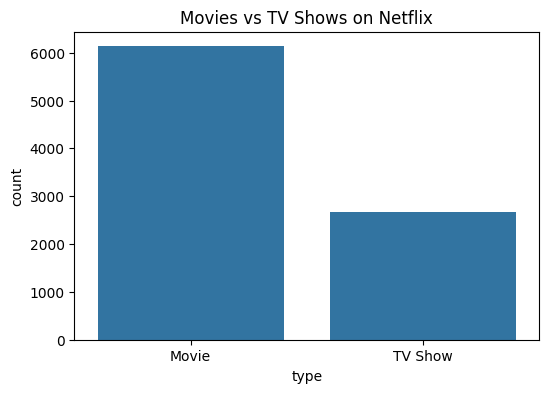

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


##Country-wise Content

“This analysis highlights the countries contributing the most content to Netflix.”

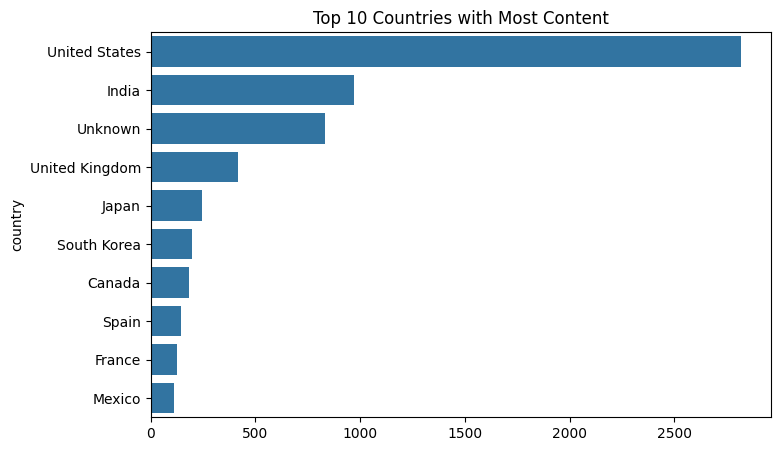

In [50]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Content")
plt.show()


##Netflix Focus time to time-

“I extracted the year from the date to analyze how Netflix content has evolved over time.”

In [51]:
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year


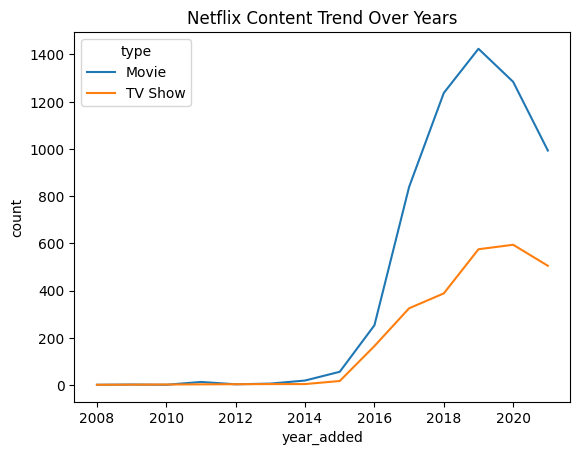

In [52]:
content_trend = df.groupby(['year_added', 'type']).size().reset_index(name='count')

sns.lineplot(data=content_trend, x='year_added', y='count', hue='type')
plt.title("Netflix Content Trend Over Years")
plt.show()


##Text Data Clustering (ML Part)

TF-IDF converts text data into numerical form by measuring word importance, while KMeans groups similar content into clusters based on these features.

“Using TF-IDF and KMeans clustering, I grouped similar movies and TV shows together.”

In [53]:
df['text_data'] = df['title'] + ' ' + df['description'] + ' ' + df['listed_in']


TF-IDF Vectorization

In [54]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['text_data'])


KMeans Clustering

In [55]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


Cluster Output Check

In [56]:
df[['title', 'listed_in', 'cluster']].head(10)


,title,listed_in,cluster
0,Dick Johnson Is Dead,Documentaries,2
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",4
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",0
3,Jailbirds New Orleans,"Docuseries, Reality TV",2
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",4
5,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",4
6,My Little Pony: A New Generation,Children & Family Movies,2
7,Sankofa,"Dramas, Independent Movies, International Movies",2
8,The Great British Baking Show,"British TV Shows, Reality TV",4
9,The Starling,"Comedies, Dramas",2


##📌 Problem Statement

The objective of this project is to analyze Netflix movies and TV shows data to understand content distribution, country-wise availability, and content trends over time. Additionally, the project aims to cluster similar content using text-based features to support recommendation and content strategy decisions.

##📌 Dataset Description

The dataset contains information about movies and TV shows available on Netflix as of 2019. It includes attributes such as title, type, country, release year, date added, rating, duration, genre, and description.
The data was collected from Flixable, a third-party Netflix search engine.

##📌 Tools and Technologies Used

Python for data analysis

Pandas and NumPy for data manipulation

Matplotlib and Seaborn for data visualization

TF-IDF for text vectorization

KMeans clustering for grouping similar content

“In this project, I used Python and its data science libraries to perform exploratory data analysis and apply machine learning techniques.”

##📊 Insight 1: Movies vs TV Shows

The analysis shows that movies form a major portion of Netflix’s content library. However, the number of TV shows has increased significantly in recent years, indicating a strategic shift toward episodic content.**bold text**

It means movies dominate the platform, Netflix has been increasingly investing in TV shows.

##📊Insight 2: Country-wise Content Distribution

The United States is the largest content producer on Netflix, followed by countries like India and the United Kingdom. This highlights Netflix’s strong focus on both global and regional markets.

“This analysis helps identify Netflix’s key content-producing countries.”

##📊Insight 3: Content Trend Over Time

Over the years, Netflix has steadily increased the addition of TV shows while the growth of movies has slowed down. This indicates a long-term content strategy focused on user engagement through series-based content.

“The trend clearly shows Netflix’s shift from movies to TV shows over time.”

##📊Insight 4: Content Clustering Using NLP

By combining textual features such as title, description, and genre, similar movies and TV shows were grouped into clusters using TF-IDF and KMeans clustering. Each cluster represents content with similar themes or genres.

##Business Recommendations

📌 Recommendation 1

Netflix should continue investing in TV shows, as they promote long-term user engagement and binge-watching behavior.

📌 Recommendation 2

Expanding region-specific content, especially in high-growth markets like India, can help Netflix increase its global subscriber base.

📌 Recommendation 3

Netflix can integrate text-based clustering into its recommendation engine to provide personalized content suggestions to users.

“This project combines exploratory data analysis and NLP-based clustering to derive actionable business insights from Netflix content data.”

##This is the github link of this project:-

https://github.com/coder-MSR51/Netflix-EDA-Project